In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [12]:
df = pd.read_csv('closing_prices.csv')
data = df.to_numpy() # if you prefer working with np array

In [13]:
n = data.shape[1]

returns = (data[1:] - data[:-1]) / data[:-1]
mu = np.mean(returns, axis=0)
C = np.cov(returns, rowvar=False)
C_inv = np.linalg.inv(C)

## 1. Monte-Carlo

In [14]:
def compute_risk_return(w):
    var = w.T @ C @ w
    ret = w.T @ mu
    return np.sqrt(var), ret

In [15]:
num_MC = 100000
weights_mc, risks_mc, rets_mc = [], [], []
for _ in tqdm(range(num_MC)):
    w = np.random.random(n)
    w /= w.sum()
    risk, ret = compute_risk_return(w)
    weights_mc.append(w)
    risks_mc.append(risk)
    rets_mc.append(ret)

  0%|          | 0/100000 [00:00<?, ?it/s]

## 2. Analytical expression

In [16]:
def compute_weights(mu_p):
    ones = np.ones(n)
    a = ones.T @ C_inv @ ones
    b = ones.T @ C_inv @ mu
    c = mu.T @ C_inv @ mu
    d = a * c - b ** 2
    lambda1 = (c - b * mu_p) / d
    lambda2 = (a * mu_p - b) / d
    w = C_inv @ (lambda1 * ones + lambda2 * mu)
    return w

In [17]:
possible_returns = np.linspace(-0.0006, 0.0004, 1000)
weights, risks, rets = [], [], []
for rp in possible_returns:
    w = compute_weights(rp)
    risk, ret = compute_risk_return(w)
    weights.append(w)
    risks.append(risk)
    rets.append(ret)


## 3. Minimal risk portfolio

In [30]:
idx_min = np.argmin(risks)
risk_min, ret_min = compute_risk_return(weights[idx_min])
print('Portfolio with minimum volatiliy')
print(f'Volatility = {100 * risk_min: .02f}%')
print(f'Expected return = {100 * ret_min: .03f}%')
print('Weights = ' + ', '.join([f'{w: .02f}' for w in weights[idx_min]]))

Portfolio with minimum volatiliy
Volatility =  0.61%
Expected return = -0.003%
Weights =  0.34,  0.03,  0.08,  0.19,  0.08,  0.14,  0.13


## Plot

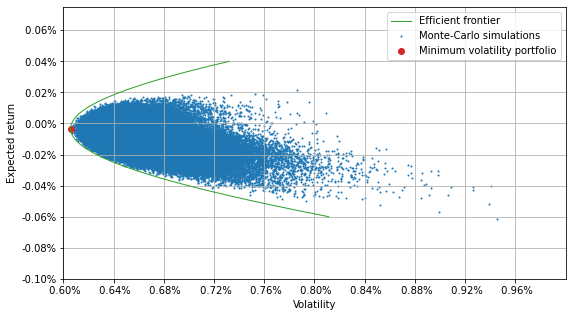

In [31]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(risks, rets, lw=1, c='tab:green', label='Efficient frontier')
ax.scatter(risks_mc, rets_mc, s=1, c='tab:blue', label='Monte-Carlo simulations')
ax.scatter(risks[idx_min], rets[idx_min], c='tab:red', label='Minimum volatility portfolio')
ax.set(xlabel='Volatility', ylabel='Expected return',
       xlim=(0.006, 0.01), xticks=np.arange(0.006, 0.01, 0.0004), xticklabels=[f'{x * 100: .02f}%' for x in np.arange(0.006, 0.01, 0.0004)],
       ylim=(-0.001, 0.00075), yticks=np.arange(-0.001, 0.00075, 0.0002), yticklabels=[f'{x * 100: .02f}%' for x in np.arange(-0.001, 0.00075, 0.0002)])
ax.grid('on')
ax.legend()
plt.show()